# Depth First Search on the given Graph
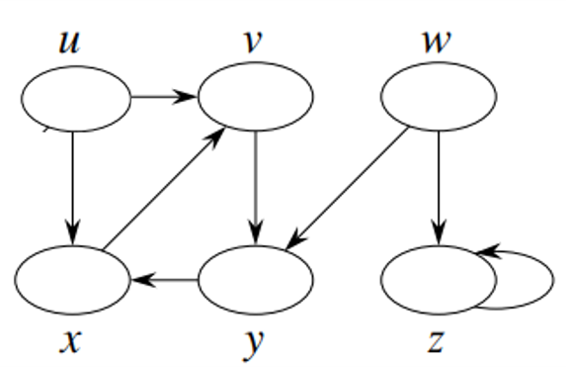

In [1]:
graph = {
    'u': ['v', 'x'],
    'v': ['y'],
    'w': ['y', 'z'],
    'x': ['v'],
    'y': ['x'],
    'z': ['z']  # self-loop
}

In [13]:
current_time = 0
node_status = {}     
node_parent = {}     
entry_time = {}      
exit_time = {}   

In [14]:
# Set initial state for all nodes before starting DFS
for node in graph:
    node_status[node] = "UNVISITED"
    node_parent[node] = None

current_time = 0
print("Initial node status:", node_status)
print("Initial parent tracking:", node_parent)

Initial node status: {'u': 'UNVISITED', 'v': 'UNVISITED', 'w': 'UNVISITED', 'x': 'UNVISITED', 'y': 'UNVISITED', 'z': 'UNVISITED'}
Initial parent tracking: {'u': None, 'v': None, 'w': None, 'x': None, 'y': None, 'z': None}


#    Runs Depth-First Search on graph G.
###    Initializes all vertices, then calls DFS-VISIT on unvisited ones.

In [18]:
def DFS_VISIT(G, u):
    """
    Visits a vertex u in DFS.
    Tracks discovery time, finish time, and parent relationships.
    """
    global current_time, node_status, node_parent, entry_time, exit_time

    node_status[node] = "VISITING"     # Mark as visiting
    current_time += 1
    entry_time[node] = current_time   # Record discovery time

    # Visit all neighbors
    for neighbor in graph[node]:
        if node_status[neighbor] == "UNVISITED":
            node_parent[neighbor] = node
            DFS_VISIT(graph, neighbor)

    node_status[node] = "VISITED"      # Mark as visited
    current_time += 1
    exit_time[node] = current_time     # Record finish time

In [17]:
def DFS(G):
    """
    Runs Depth-First Search on graph G.
    Initializes all vertices, then calls DFS-VISIT on unvisited ones.
    """
    global current_time, node_status, node_parent, entry_time, exit_time

    # Initialize nodes
    for node in graph:
        node_status[node] = "UNVISITED"
        node_parent[node] = None

    current_time = 0

    # Visit unvisited nodes
    for node in graph:
        if node_status[node] == "UNVISITED":
            DFS_VISIT(graph, node)

In [19]:
DFS(graph)

# Display the recorded times and parent relationships
print("Node Discovery Times:", entry_time)
print("Node Finishing Times:", exit_time)
print("Parent Relationships:", node_parent)

Node Discovery Times: {'z': 9}
Node Finishing Times: {'z': 10}
Parent Relationships: {'u': None, 'v': None, 'w': None, 'x': None, 'y': None, 'z': None}


C:\Users\ap901\AppData\Local\Temp\ipykernel_23024\404168690.py:40: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(scatterpoints=1)


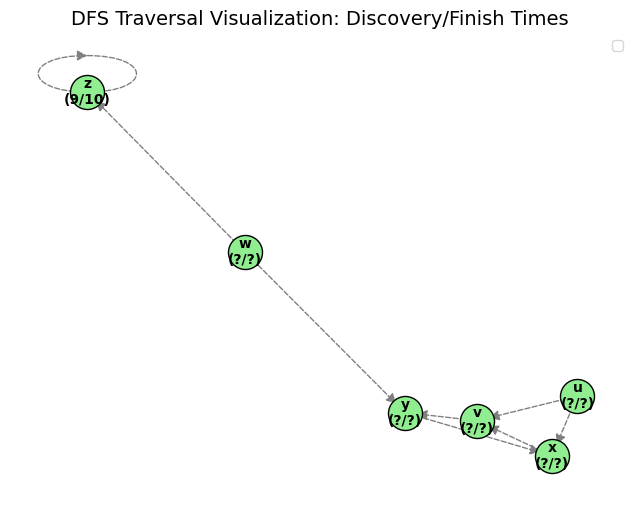

In [26]:
import networkx as nx
import matplotlib.pyplot as plt

# Build networkx graph from the updated adjacency_list
G = nx.DiGraph()
for node in graph:
    for neighbor in graph[node]:
        G.add_edge(node, neighbor)

# Positioning
pos = nx.spring_layout(G, seed=42)

# DFS tree edges
dfs_tree_edges = [(parent, child) for child, parent in node_parent.items() if parent is not None]
non_tree_edges = [edge for edge in G.edges() if edge not in dfs_tree_edges]

# Draw the graph
plt.figure(figsize=(8, 6))

# Tree edges in red
nx.draw_networkx_edges(G, pos, edgelist=dfs_tree_edges, edge_color="red",
                       arrows=True, arrowsize=20, width=2, label="DFS Tree")

# Other edges in dashed gray
nx.draw_networkx_edges(G, pos, edgelist=non_tree_edges, edge_color="gray",
                       style="dashed", arrows=True, arrowsize=15, label="Non-tree Edges")

# Draw nodes
nx.draw_networkx_nodes(G, pos, node_color="lightgreen", node_size=600, edgecolors="black")

# Labels: use discovery/finish times if available, else '?'
node_labels = {
    n: f"{n}\n({entry_time.get(n, '?')}/{exit_time.get(n, '?')})"
    for n in G.nodes()
}

nx.draw_networkx_labels(G, pos, labels=node_labels, font_size=10, font_weight="bold")

plt.title("DFS Traversal Visualization: Discovery/Finish Times", fontsize=14)
plt.legend(scatterpoints=1)
plt.axis('off')
plt.show()
